# 2. Создание нейронной сети без использования готовых решений

__Автор__: Никита Владимирович Блохин (NVBlokhin@fa.ru)

Финансовый университет, 2020 г. 

In [342]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [343]:
torch.set_warn_always(True)

## 1. Создание нейронов и полносвязных слоев

1.1. Используя операции над матрицами и векторами из библиотеки `torch`, реализовать нейрон с заданными весами `weights` и `bias`. Прогнать вектор `inputs` через нейрон и вывести результат. 

In [344]:
class Neuron:

    def __init__(self, weights: torch.Tensor, bias: torch.Tensor):
        self.weights = weights
        self.bias = bias

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return torch.sum(inputs * self.weights) + self.bias

In [345]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([-0.2, 0.3, -0.5, 0.7])
bias = torch.tensor(3.14)

In [346]:
neuron = Neuron(weights, bias)
print(f'Neuron.forward: {neuron.forward(inputs)}')
print(f'functional.linear: {F.linear(inputs, weights, bias)}')

Neuron.forward: 4.840000152587891
functional.linear: 4.840000152587891


1.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой с заданными весами `weights` и `biases`. Прогнать вектор `inputs` через слой и вывести результат. 

In [347]:
class Linear:

    def __init__(self, weights: torch.Tensor, biases: torch.Tensor):
        self.weights = weights
        self.biases = biases

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return torch.matmul(inputs, self.weights.T) + self.biases

In [348]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([[-0.2, 0.3, -0.5, 0.7],
                        [0.5, -0.91, 0.26, -0.5],
                        [-0.26, -0.27, 0.17, 0.87]])  # убрал .T

biases = torch.tensor([3.14, 2.71, 7.2])

In [349]:
m = Linear(weights, biases)
print(f'Linear.forward:\n{m.forward(inputs)}')
print(f'\nfunctional.linear:\n{F.linear(inputs, weights, biases)}')

Linear.forward:
tensor([ 4.8400,  0.1700, 10.3900])

functional.linear:
tensor([ 4.8400,  0.1700, 10.3900])


1.3 Реализовать полносвязный слой из __2.1.2__ таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. Продемонстрировать работу.
Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.


In [350]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

In [351]:
m = Linear(weights, biases)
print(f'Linear.forward:\n{m.forward(inputs)}')
print(f'\nfunctional.linear:\n{F.linear(inputs, weights, biases)}')

Linear.forward:
tensor([[ 3.7900,  0.9200,  9.0850],
        [ 6.1400, -2.1000,  6.9000],
        [ 2.0400,  0.7610,  6.7260]])

functional.linear:
tensor([[ 3.7900,  0.9200,  9.0850],
        [ 6.1400, -2.1000,  6.9000],
        [ 2.0400,  0.7610,  6.7260]])


1.4 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой из `n_neurons` нейронов с `n_features` весами у каждого нейрона (инициализируются из стандартного нормального распределения). Прогнать вектор `inputs` через слой и вывести результат. Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.

In [352]:
class Linear:

    def __init__(self, in_features: int, out_features: int):
        self.in_features = in_features
        self.out_features = out_features

        self.weights = torch.randn(out_features, in_features, requires_grad=True)
        self.biases = torch.randn(out_features, requires_grad=True)

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return torch.matmul(inputs, self.weights.T) + self.biases

In [353]:
torch.manual_seed(0)

m = Linear(4, 3)
m.forward(inputs)

tensor([[ -5.0178,   0.5240,  -3.9319],
        [  4.0738,  -6.7887,  -3.5657],
        [-11.6052,  -0.3882,  -3.1959]], grad_fn=<AddBackward0>)

In [354]:
# проверка
nn_m = nn.Linear(4, 3)
nn_m.weight = nn.Parameter(m.weights)
nn_m.bias = nn.Parameter(m.biases)
nn_m.forward(inputs)

tensor([[ -5.0178,   0.5240,  -3.9319],
        [  4.0738,  -6.7887,  -3.5657],
        [-11.6052,  -0.3882,  -3.1959]], grad_fn=<AddmmBackward0>)

1.5 Используя решение из __1.4__, создать 2 полносвязных слоя и пропустить матрицу `inputs` последовательно через эти два слоя. Количество нейронов в первом слое выбрать произвольно, количество нейронов во втором слое выбрать так, чтобы результатом прогона являлась матрица (3x7).

In [355]:
class NeuralNet:

    def __init__(self):
        self.input = Linear(4, 10)
        self.output = Linear(10, 7)

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return self.output.forward(self.input.forward(inputs))

In [356]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

In [357]:
torch.manual_seed(0)

m = NeuralNet()
m.forward(inputs)

tensor([[ 10.7402,   5.0857,  -1.4572, -15.8939, -12.8903,   1.4945,   8.3048],
        [ 16.8392,   7.5460,  -9.4385,  17.2115, -15.5890, -11.7024,  22.9214],
        [  4.0594,  15.9168,   6.6248,   3.1291,  -5.7448,  -8.4944,  -6.8320]],
       grad_fn=<AddBackward0>)

## 2. Создание функций активации

In [358]:
def randn(*size: int, seed: int = 0) -> torch.Tensor:
    torch.manual_seed(seed)
    return torch.randn(*size)

2.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ReLU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [359]:
class ReLU:

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return torch.maximum(inputs, torch.tensor(0))

In [360]:
inputs = randn(4, 3)
inputs

tensor([[ 1.5410, -0.2934, -2.1788],
        [ 0.5684, -1.0845, -1.3986],
        [ 0.4033,  0.8380, -0.7193],
        [-0.4033, -0.5966,  0.1820]])

In [361]:
relu = ReLU()
nn_relu = nn.ReLU()
print(f'ReLU:\n{relu.forward(inputs)}')
print(f'\nnn.ReLU:\n{nn_relu.forward(inputs)}')

ReLU:
tensor([[1.5410, 0.0000, 0.0000],
        [0.5684, 0.0000, 0.0000],
        [0.4033, 0.8380, 0.0000],
        [0.0000, 0.0000, 0.1820]])

nn.ReLU:
tensor([[1.5410, 0.0000, 0.0000],
        [0.5684, 0.0000, 0.0000],
        [0.4033, 0.8380, 0.0000],
        [0.0000, 0.0000, 0.1820]])


2.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации softmax:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6d7500d980c313da83e4117da701bf7c8f1982f5)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации. Строки матрицы трактовать как выходы линейного слоя некоторого классификатора для 4 различных примеров.

In [362]:
class Softmax:

    def __init__(self, dim: int = 0):
        assert dim == 0 or dim == 1
        self.dim = dim

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        exp = torch.exp(inputs)
        return exp / torch.sum(exp, dim=self.dim).unsqueeze(self.dim)

In [363]:
inputs = randn(4, 3)
inputs

tensor([[ 1.5410, -0.2934, -2.1788],
        [ 0.5684, -1.0845, -1.3986],
        [ 0.4033,  0.8380, -0.7193],
        [-0.4033, -0.5966,  0.1820]])

In [364]:
softmax = Softmax(dim=1)
nn_softmax = nn.Softmax(dim=1)
print(f'Softmax:\n{softmax.forward(inputs)}')
print(f'\nnn.Softmax:\n{nn_softmax.forward(inputs)}')

Softmax:
tensor([[0.8446, 0.1349, 0.0205],
        [0.7511, 0.1438, 0.1051],
        [0.3484, 0.5382, 0.1134],
        [0.2762, 0.2277, 0.4961]])

nn.Softmax:
tensor([[0.8446, 0.1349, 0.0205],
        [0.7511, 0.1438, 0.1051],
        [0.3484, 0.5382, 0.1134],
        [0.2762, 0.2277, 0.4961]])


2.3 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ELU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eb23becd37c3602c4838e53f532163279192e4fd)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [365]:
class ELU:

    def __init__(self, alpha: float = 1):
        self.alpha = alpha

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return torch.where(inputs > 0, inputs, self.alpha * (torch.exp(inputs) - 1))

In [366]:
inputs = randn(4, 3)
inputs

tensor([[ 1.5410, -0.2934, -2.1788],
        [ 0.5684, -1.0845, -1.3986],
        [ 0.4033,  0.8380, -0.7193],
        [-0.4033, -0.5966,  0.1820]])

In [367]:
elu = ELU(alpha=1.409)
nn_elu = nn.ELU(alpha=1.409)
print(f'ELU:\n{elu.forward(inputs)}')
print(f'\nnn.ELU:\n{nn_elu.forward(inputs)}')

ELU:
tensor([[ 1.5410, -0.3583, -1.2495],
        [ 0.5684, -0.9327, -1.0611],
        [ 0.4033,  0.8380, -0.7227],
        [-0.4677, -0.6331,  0.1820]])

nn.ELU:
tensor([[ 1.5410, -0.3583, -1.2495],
        [ 0.5684, -0.9327, -1.0611],
        [ 0.4033,  0.8380, -0.7227],
        [-0.4677, -0.6331,  0.1820]])


## 3. Создание функции потерь

3.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь MSE:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)

Создать полносвязный слой с 1 нейроном, прогнать через него батч `inputs` и посчитать значение MSE, трактуя вектор `y` как вектор правильных ответов.

In [368]:
class MSELoss:

    def forward(self, y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
        return torch.mean((y_true - y_pred) ** 2)

In [369]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([2, 3, 4]).unsqueeze(1)

In [370]:
torch.manual_seed(0)

layer = Linear(4, 1)
y_pred = layer.forward(inputs)

In [371]:
mse = MSELoss()
nn_mse = nn.MSELoss()
print(f'MSELoss:\n{mse.forward(y_pred, y)}')
print(f'\nnn.MSELoss:\n{nn_mse.forward(y_pred, y)}')

MSELoss:
101.30004119873047

nn.MSELoss:
101.30004119873047


3.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь Categorical Cross-Entropy:

<img src="https://i.ibb.co/93gy1dN/Screenshot-9.png" width="200">

Создать полносвязный слой с 3 нейронами и прогнать через него батч `inputs`. Полученный результат пропустить через функцию активации softmax. Посчитать значение CCE, трактуя вектор `y` как вектор правильных ответов.

In [372]:
class CategoricalCrossEntropyLoss:

    def forward(self, y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
        return torch.mean(-torch.sum(y_true * torch.log(y_pred), dim=1))

In [373]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([1, 0, 0])

In [374]:
torch.manual_seed(0)

layer = Linear(4, 3)
softmax = Softmax()
y_pred = softmax.forward(layer.forward(inputs))

In [375]:
cce = CategoricalCrossEntropyLoss()
cce.forward(y_pred, y)

tensor(8.2570, grad_fn=<MeanBackward0>)

3.3 Модифицировать 2.3.1, добавив L2-регуляризацию.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d92ca2429275bfdc0474523babbafe014ca8b580)


In [376]:
class MSELossL2:

    def __init__(self, lambda_: float, weights: torch.Tensor):
        self.lambda_ = lambda_
        self.weights = weights

    def data_loss(self, y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
        return torch.sum((y_true - y_pred) ** 2)

    def reg_loss(self) -> torch.Tensor:
        return self.lambda_ * torch.sum(self.weights ** 2)

    def forward(self, y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
        return self.data_loss(y_pred, y_true) + self.reg_loss()

In [377]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([2, 3, 4]).unsqueeze(1)

In [378]:
torch.manual_seed(0)

layer = Linear(4, 1)
y_pred = layer.forward(inputs)

In [379]:
mse_l2 = MSELossL2(lambda_=1.409, weights=layer.weights)
mse_l2.forward(y_pred, y)

tensor(314.5113, grad_fn=<AddBackward0>)

## 4. Обратное распространение ошибки

4.1 Используя один нейрон и SGD (1 пример за шаг), решите задачу регрессии

In [380]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5, random_state=0)
# X.dtype == float64 - нет смысла использовать torch.from_numpy
# т.к. последующее приведение типов Tensor.type(torch.float32) приведет к копированию данных
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

[Граф вычислений для этой задачи](https://i.ibb.co/2dhDxZx/photo-2021-02-15-17-18-04.jpg)

4.1.1 Модифицируйте класс `MSELoss` из __2.3.1__, реализовав расчет производной относительно предыдущего слоя


In [381]:
class MSELoss:

    def forward(self, y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
        return (y_pred - y_true) ** 2  # когда MSE (mean squared error) без mean

    def backward(self, y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
        # здравая мысль - похоже на производную MSE, только mean потерялась,
        # т.к. обработка по одному ответу за шаг
        return 2 * (y_pred - y_true)  # df/dc

4.1.2. Модифицируйте класс `Neuron` из __2.1.1__:

  1) Сделайте так, чтобы веса нейрона инициализировались из стандартного нормального распределения

  2) Реализуйте расчет градиента относительно весов `weights` и `bias`

In [382]:
class Neuron:

    def __init__(self, in_features: int):
        self.in_features = in_features
        self.weights = torch.randn(self.in_features)
        self.bias = torch.randn(1)

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return torch.sum(inputs * self.weights) + self.bias

    def backward(self, dvalue: torch.Tensor, inputs: torch.Tensor) -> tuple[torch.Tensor, torch.Tensor, torch.Tensor]:
        dw = dvalue * inputs
        db = dvalue
        dx = dvalue * self.weights
        return dw, db, dx

4.1.3 Допишите цикл для настройки весов нейрона

[SGD](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/dda3670f8a8996a0d3bf80856bb4a166cc8db6d4)

In [383]:
def pretty_train_log(epoch: int, **kwargs) -> None:
    params = '\n\t'.join([f'{k} = {v}' for k, v in kwargs.items()])
    print(f'epoch {epoch:03} |' + '-' * 50 + f'\n\t{params}\n')

In [384]:
# работает как часы 🕓...
torch.manual_seed(0)

n_inputs = X.size(1)  # размерность элемента выборки
learning_rate = 0.1  #  скорость обучения
n_epoch = 100  #  количество эпох

y_true = y.unsqueeze(1)

neuron = Neuron(n_inputs)
loss = MSELoss()

for epoch in range(n_epoch + 1):
    for i, (x_example, y_example) in enumerate(zip(X, y_true)):
        # forward pass
        y_pred = neuron.forward(x_example)  # прогон через нейрон
        curr_loss = loss.forward(y_pred, y_example)  # прогон через функцию потерь

        # backprop
        # вызов методов backward
        dw, db, _ = neuron.backward(loss.backward(y_pred, y_example), x_example)
        # обратите внимание на последовательность вызовов: от конца к началу

        # шаг оптимизации для весов (weights и bias) нейрона
        neuron.weights -= learning_rate * dw
        neuron.bias -= learning_rate * db

        if epoch % 20 == 0 and i % 30 == 0:
            pretty_train_log(epoch, i=i, weights=neuron.weights, dw=dw, bias=neuron.bias, db=db, loss=curr_loss)

neuron.weights, coef

epoch 000 |--------------------------------------------------
	i = 0
	weights = tensor([ 5.8937,  3.4480,  8.5208, -6.0718])
	dw = tensor([ -43.5271,  -37.4140, -106.9956,   66.4020])
	bias = tensor([-9.6251])
	db = tensor([85.4055])
	loss = tensor([1823.5259])

epoch 000 |--------------------------------------------------
	i = 30
	weights = tensor([21.6376, 36.3937, 65.8168, 88.4170])
	dw = tensor([9.4374, 2.5177, 7.3150, 2.5319])
	bias = tensor([1.1639])
	db = tensor([7.9437])
	loss = tensor([15.7756])

epoch 000 |--------------------------------------------------
	i = 60
	weights = tensor([20.5037, 34.1982, 67.6044, 87.9179])
	dw = tensor([ 0.0004,  0.0003, -0.0005,  0.0003])
	bias = tensor([0.4687])
	db = tensor([0.0006])
	loss = tensor([1.0514e-07])

epoch 000 |--------------------------------------------------
	i = 90
	weights = tensor([20.4878, 34.1696, 67.6197, 87.9236])
	dw = tensor([-0.0058,  0.0145,  0.0002,  0.0066])
	bias = tensor([0.5022])
	db = tensor([-0.0090])
	loss = 

(tensor([20.4924, 34.1698, 67.6242, 87.9235]),
 array([20.4923687 , 34.16981149, 67.62424823, 87.9234763 ]))

Судя по выводу задача регрессии была решена еще в конце 1-ой эпохи (первобытности).
Зачем тогда пакетный градиентный спуск, если этот работает быстрее?

Зачем мы это все делали и почему называем обратным распространением, если уже знаем всю производную?

**Проверка**

Сделаем то же самое, но пусть производную посчитает pytorch (честно, будто не знаем производную сложной функции)

In [385]:
class MSELoss:

    def __init__(self):
        self._last_forward: torch.Tensor | None = None

    def forward(self, y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
        self._last_forward = (y_pred - y_true) ** 2
        return self._last_forward

    def backward(self) -> None:
        self._last_forward.backward()


class Neuron:

    def __init__(self, in_features: int):
        self.in_features = in_features
        self.weights = torch.randn(self.in_features, requires_grad=True)
        self.bias = torch.randn(1, requires_grad=True)

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return torch.sum(inputs * self.weights) + self.bias

    def backward(self) -> tuple[torch.Tensor, torch.Tensor]:
        dw = self.weights.grad.clone().detach()
        db = self.bias.grad.clone().detach()
        self.weights.grad.zero_()
        self.bias.grad.zero_()
        return dw, db

    def update_weights(self, lr: float, dw: torch.Tensor, db: torch.Tensor) -> None:
        with torch.no_grad():
            self.weights -= lr * dw
            self.bias -= lr * db

In [386]:
torch.manual_seed(0)

y_true = y.unsqueeze(1)

neuron = Neuron(X.size(1))
mse = MSELoss()

learning_rate = 0.1

epochs = 100
for epoch in range(epochs + 1):
    for i, (x_example, y_example) in enumerate(zip(X, y_true)):
        # feed forward
        y_pred = neuron.forward(x_example)
        loss = mse.forward(y_pred, y_example)

        # backward
        mse.backward()
        dw, db = neuron.backward()

        # optimize step
        neuron.update_weights(learning_rate, dw, db)

        if epoch % 20 == 0 and i % 30 == 0:
            pretty_train_log(epoch, i=i, weights=neuron.weights, dw=dw, bias=neuron.bias, db=db, loss=loss)

neuron.weights, coef

epoch 000 |--------------------------------------------------
	i = 0
	weights = tensor([ 5.8937,  3.4480,  8.5208, -6.0718], requires_grad=True)
	dw = tensor([ -43.5271,  -37.4140, -106.9956,   66.4020])
	bias = tensor([-9.6251], requires_grad=True)
	db = tensor([85.4055])
	loss = tensor([1823.5259], grad_fn=<PowBackward0>)

epoch 000 |--------------------------------------------------
	i = 30
	weights = tensor([21.6376, 36.3937, 65.8168, 88.4170], requires_grad=True)
	dw = tensor([9.4374, 2.5177, 7.3150, 2.5319])
	bias = tensor([1.1639], requires_grad=True)
	db = tensor([7.9437])
	loss = tensor([15.7756], grad_fn=<PowBackward0>)

epoch 000 |--------------------------------------------------
	i = 60
	weights = tensor([20.5037, 34.1982, 67.6044, 87.9179], requires_grad=True)
	dw = tensor([ 0.0004,  0.0003, -0.0005,  0.0003])
	bias = tensor([0.4687], requires_grad=True)
	db = tensor([0.0006])
	loss = tensor([1.0514e-07], grad_fn=<PowBackward0>)

epoch 000 |-------------------------------

(tensor([20.4924, 34.1698, 67.6242, 87.9235], requires_grad=True),
 array([20.4923687 , 34.16981149, 67.62424823, 87.9234763 ]))

4.2 Решите задачу 2.4.1, используя пакетный градиентный спуск

Вычисления для этой задачи: 
[1](https://i.ibb.co/rmtQT6P/photo-2021-02-15-18-00-43.jpg)
[2](https://i.ibb.co/NmCFVnQ/photo-2021-02-15-18-01-17.jpg)

4.2.1 Модифицируйте класс `MSELoss` из __3.1__, реализовав расчет производной относительно предыдущего слоя с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами
 

In [387]:
# использование mean в методах вызывает доверие к имени класса
class MSELoss:

    def forward(self, y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
        return torch.mean((y_pred - y_true) ** 2)

    def backward(self, y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
        return 2 * (y_pred - y_true) / y_pred.size(0)

4.2.2. Модифицируйте класс `Neuron` из __4.1.2__:

  1) Реализуйте метод `forward` таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. 

  2) Реализуйте расчет градиента относительно весов `weights` и `bias` с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами

In [388]:
# а это точно еще нейрон, а не полносвязный слой из одного нейрона с in_features входами?
class Neuron:

    def __init__(self, in_features: int):
        self.in_features = in_features
        self.weights = torch.randn(1, in_features)
        self.bias = torch.randn(1)

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return torch.matmul(inputs, self.weights.T) + self.bias

    def backward(self, dvalue: torch.Tensor, inputs: torch.Tensor) -> tuple[torch.Tensor, torch.Tensor, torch.Tensor]:
        # dw = torch.mean(dvalue * inputs, dim=0)
        # db = torch.mean(dvalue)
        # dx = dvalue * self.weights
        dw = torch.matmul(inputs.T, dvalue).T
        db = torch.matmul(torch.ones(dvalue.size(0)), dvalue)
        dx = torch.matmul(dvalue, self.weights)
        return dw, db, dx

4.2.3 Допишите цикл для настройки весов нейрона

In [389]:
torch.manual_seed(0)

y_true = y.unsqueeze(1)
neuron = Neuron(X.size(1))
mse = MSELoss()

learning_rate = 0.1
epochs = 100

for epoch in range(epochs + 1):
    y_pred = neuron.forward(X)
    loss = mse.forward(y_pred, y_true)

    dw, db, _ = neuron.backward(mse.backward(y_pred, y_true), X)

    neuron.weights -= learning_rate * dw
    neuron.bias -= learning_rate * db

    if epoch % 10 == 0:
        pretty_train_log(epoch, weights=neuron.weights, dw=dw, bias=neuron.bias, db=db, loss=loss)

neuron.weights, coef

epoch 000 |--------------------------------------------------
	weights = tensor([[ 8.6293,  9.3343, 10.9663, 17.8038]])
	dw = tensor([[ -70.8827,  -96.2774, -131.4513, -172.3539]])
	bias = tensor([-1.3156])
	db = tensor([2.3111])
	loss = 14444.6875

epoch 010 |--------------------------------------------------
	weights = tensor([[22.7480, 35.5011, 58.5014, 79.6487]])
	dw = tensor([[  0.8807,  -3.2026, -16.2397, -19.1752]])
	bias = tensor([-0.2226])
	db = tensor([-1.0528])
	loss = 184.8304901123047

epoch 020 |--------------------------------------------------
	weights = tensor([[21.2786, 35.1800, 65.5825, 86.8190]])
	dw = tensor([[ 1.0790,  1.0197, -3.1022, -2.3846]])
	bias = tensor([0.2985])
	db = tensor([-0.2510])
	loss = 6.3272294998168945

epoch 030 |--------------------------------------------------
	weights = tensor([[20.6966, 34.4885, 67.1042, 87.7555]])
	dw = tensor([[ 0.2998,  0.4234, -0.7472, -0.3366]])
	bias = tensor([0.4332])
	db = tensor([-0.0761])
	loss = 0.37050163745880

(tensor([[20.4924, 34.1698, 67.6242, 87.9235]]),
 array([20.4923687 , 34.16981149, 67.62424823, 87.9234763 ]))

4.3 Используя один полносвязный слой и пакетный градиентный спуск, решите задачу регрессии из __2.4.1__

4.3.1 Модифицируйте класс `Linear` из __1.4__. ([вычисление градиентов](https://i.ibb.co/kgVR6m6/photo-2021-02-15-21-30-28.jpg))

In [390]:
# подозрительно 🧐 похоже на предыдущий нейрон (просто совпадение)
class Linear:

    def __init__(self, in_features: int, out_features: int):
        self.in_features = in_features
        self.out_features = out_features

        self.weights = torch.randn(out_features, in_features)
        self.biases = torch.randn(out_features)

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return torch.matmul(inputs, self.weights.T) + self.biases

    def backward(self, dvalue: torch.Tensor, inputs: torch.Tensor) -> tuple[torch.Tensor, torch.Tensor, torch.Tensor]:
        # dw = torch.mean(dvalue * inputs, dim=0)
        # dw = torch.matmul(inputs.T, dvalue)
        # db = torch.mean(dvalue)
        # print(dw.size(), db.size())
        # dx = dvalue * self.weights
        # dx = torch.matmul(dvalue, self.weights.T)
        # dx = 1

        dw = torch.matmul(inputs.T, dvalue).T
        db = torch.matmul(torch.ones(dvalue.size(0)), dvalue)
        dx = torch.matmul(dvalue, self.weights)
        return dw, db, dx

4.3.2 Создайте слой с одним нейроном. Используя класс MSELoss из 2.4.2, убедитесь, что модель обучается

In [391]:
torch.manual_seed(0)

y_true = y.unsqueeze(1)
layer = Linear(X.size(1), 1)
mse = MSELoss()

learning_rate = 0.1
epochs = 100

for epoch in range(epochs + 1):
    y_pred = layer.forward(X)
    loss = mse.forward(y_pred, y_true)

    dw, db, _ = layer.backward(mse.backward(y_pred, y_true), X)

    layer.weights -= learning_rate * dw
    layer.biases -= learning_rate * db

    if epoch % 10 == 0:
        pretty_train_log(epoch, weights=layer.weights, dw=dw, biases=layer.biases, db=db, loss=loss)

neuron.weights, coef

epoch 000 |--------------------------------------------------
	weights = tensor([[ 8.6293,  9.3343, 10.9663, 17.8038]])
	dw = tensor([[ -70.8827,  -96.2774, -131.4513, -172.3539]])
	biases = tensor([-1.3156])
	db = tensor([2.3111])
	loss = 14444.6875

epoch 010 |--------------------------------------------------
	weights = tensor([[22.7480, 35.5011, 58.5014, 79.6487]])
	dw = tensor([[  0.8807,  -3.2026, -16.2397, -19.1752]])
	biases = tensor([-0.2226])
	db = tensor([-1.0528])
	loss = 184.8304901123047

epoch 020 |--------------------------------------------------
	weights = tensor([[21.2786, 35.1800, 65.5825, 86.8190]])
	dw = tensor([[ 1.0790,  1.0197, -3.1022, -2.3846]])
	biases = tensor([0.2985])
	db = tensor([-0.2510])
	loss = 6.3272294998168945

epoch 030 |--------------------------------------------------
	weights = tensor([[20.6966, 34.4885, 67.1042, 87.7555]])
	dw = tensor([[ 0.2998,  0.4234, -0.7472, -0.3366]])
	biases = tensor([0.4332])
	db = tensor([-0.0761])
	loss = 0.370501

(tensor([[20.4924, 34.1698, 67.6242, 87.9235]]),
 array([20.4923687 , 34.16981149, 67.62424823, 87.9234763 ]))

**Проверка**

А pytorch точно правильно работает?

In [392]:
torch.manual_seed(0)

weights = torch.randn(1, 4)
bias = torch.randn(1)

y_true = y.unsqueeze(1)
layer = nn.Linear(X.size(1), 1)
layer.weight = nn.Parameter(weights, requires_grad=True)
layer.bias = nn.Parameter(bias, requires_grad=True)
mse = nn.MSELoss()

learning_rate = 0.1
optimizer = torch.optim.SGD([layer.weight, layer.bias], lr=learning_rate)
epochs = 100

for epoch in range(epochs + 1):
    y_pred = layer.forward(X)
    loss = mse.forward(y_pred, y_true)

    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        pretty_train_log(epoch, weight=layer.weight.data, bias=layer.bias.data, loss=loss)

    optimizer.zero_grad()

neuron.weights, coef

epoch 000 |--------------------------------------------------
	weight = tensor([[ 8.6293,  9.3343, 10.9663, 17.8038]])
	bias = tensor([-1.3156])
	loss = 14444.6875

epoch 010 |--------------------------------------------------
	weight = tensor([[22.7480, 35.5011, 58.5014, 79.6487]])
	bias = tensor([-0.2226])
	loss = 184.83056640625

epoch 020 |--------------------------------------------------
	weight = tensor([[21.2786, 35.1800, 65.5825, 86.8190]])
	bias = tensor([0.2985])
	loss = 6.3272294998168945

epoch 030 |--------------------------------------------------
	weight = tensor([[20.6966, 34.4885, 67.1042, 87.7555]])
	bias = tensor([0.4332])
	loss = 0.37050163745880127

epoch 040 |--------------------------------------------------
	weight = tensor([[20.5444, 34.2572, 67.4866, 87.8947]])
	bias = tensor([0.4777])
	loss = 0.024939415976405144

epoch 050 |--------------------------------------------------
	weight = tensor([[20.5058, 34.1929, 67.5875, 87.9180]])
	bias = tensor([0.4929])
	l

(tensor([[20.4924, 34.1698, 67.6242, 87.9235]]),
 array([20.4923687 , 34.16981149, 67.62424823, 87.9234763 ]))

4.4 Используя наработки из 2.4, создайте нейросеть и решите задачу регрессии.

Предлагаемая архитектура: 
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

In [393]:
torch.manual_seed(0)

X = torch.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * torch.rand(X.size())

X.size(), y.size()

(torch.Size([100, 1]), torch.Size([100, 1]))

In [394]:
class Activation_ReLU:

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        self.inputs = inputs
        self.output = inputs.clip(min=0)
        return self.output

    def backward(self, dvalues: torch.Tensor) -> None:
        self.dinputs = dvalues.clone()
        self.dinputs[self.inputs <= 0] = 0

In [395]:
# подозрительно 🧐 похоже на предыдущий нейрон (просто совпадение)
class Linear:

    def __init__(self, in_features: int, out_features: int):
        self.in_features = in_features
        self.out_features = out_features

        self.weights = torch.randn(out_features, in_features)
        self.biases = torch.randn(out_features)

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return torch.matmul(inputs, self.weights.T) + self.biases

    def backward(self, dvalue: torch.Tensor, inputs: torch.Tensor) -> tuple[torch.Tensor, torch.Tensor, torch.Tensor]:
        dw = torch.matmul(inputs.T, dvalue).T
        db = torch.matmul(torch.ones(dvalue.size(0)), dvalue)
        dx = torch.matmul(dvalue, self.weights)
        return dw, db, dx

In [400]:
torch.manual_seed(0)

# создание компонентов сети
fc1 = Linear(X.size(1), 10)
relu1 = Activation_ReLU()
fc2 = Linear(10, 1)

mse = MSELoss()
lr = 0.02
epochs = 2000

predicts = []
for epoch in range(epochs + 1):
    # <forward pass>
    # fc1 > relu1 > fc2 > loss
    fc1_x = fc1.forward(X)
    relu1_x = relu1.forward(fc1_x)
    y_pred = fc2.forward(relu1_x)

    loss = mse.forward(y_pred, y)  # <прогон через функцию потерь>

    if epoch % 200 == 0:
        pretty_train_log(epoch, loss=loss)
        predicts.append(y_pred)

    # <backprop>
    # loss > fc2 > relu1 > fc1
    mse_d = mse.backward(y_pred, y)
    dw2, db2, dx2 = fc2.backward(mse_d, relu1_x)

    relu1.backward(dx2)
    dw1, db1, dx1 = fc1.backward(relu1.dinputs, X)

    # <шаг оптимизации для fc1>
    fc1.weights -= lr * dw1
    fc1.biases -= lr * db1

    # <шаг оптимизации для fc2>
    fc2.weights -= lr * dw2
    fc2.biases -= lr * db2

predicts = predicts[::2]

epoch 000 |--------------------------------------------------
	loss = 3.8516311645507812

epoch 200 |--------------------------------------------------
	loss = 0.00728559261187911

epoch 400 |--------------------------------------------------
	loss = 0.005183662287890911

epoch 600 |--------------------------------------------------
	loss = 0.004410795401781797

epoch 800 |--------------------------------------------------
	loss = 0.004125623498111963

epoch 1000 |--------------------------------------------------
	loss = 0.004014131613075733

epoch 1200 |--------------------------------------------------
	loss = 0.003962446004152298

epoch 1400 |--------------------------------------------------
	loss = 0.00393940694630146

epoch 1600 |--------------------------------------------------
	loss = 0.003925209864974022

epoch 1800 |--------------------------------------------------
	loss = 0.003915079403668642

epoch 2000 |--------------------------------------------------
	loss = 0.003907

In [397]:
class NeuralNet:

    def __init__(self, in_features: int, out_features: int):
        self.in_features = in_features
        self.out_features = out_features

        self.fc1 = nn.Linear(in_features, 10)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(10, out_features)

    def parameters(self) -> list[torch.Tensor]:
        return [*self.fc1.parameters(), *self.fc2.parameters()]

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return self.fc2.forward(self.relu1.forward(self.fc1.forward(inputs)))

In [398]:
torch.manual_seed(0)

model = NeuralNet(X.size(1), 1)
mse = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.02)
epochs = 2000

predicts = []
for epoch in range(epochs + 1):
    y_pred = model.forward(X)
    loss = mse.forward(y_pred, y)

    loss.backward()
    optimizer.step()

    if epoch % 200 == 0:
        pretty_train_log(
            epoch,
            w1=model.fc1.weight.data,
            dw1=model.fc1.weight.grad,
            b1=model.fc1.bias.data,
            db1=model.fc1.bias.grad,
            w2=model.fc2.weight.data,
            dw2=model.fc2.weight.grad,
            b2=model.fc2.bias.data,
            db2=model.fc2.bias.grad,
            loss=loss)
        predicts.append(y_pred)

    optimizer.zero_grad()

predicts = predicts[::2]

epoch 000 |--------------------------------------------------
	w1 = tensor([[-0.0075],
        [ 0.5387],
        [-0.8230],
        [-0.7364],
        [-0.3852],
        [ 0.2685],
        [-0.0190],
        [ 0.7909],
        [-0.0887],
        [ 0.2646]])
	dw1 = tensor([[ 0.0000],
        [-0.1127],
        [ 0.0000],
        [ 0.0225],
        [ 0.0000],
        [-0.0152],
        [-0.0382],
        [ 0.0980],
        [ 0.0000],
        [ 0.0000]])
	b1 = tensor([-0.3022, -0.1935, -0.9553, -0.6618, -0.4122,  0.0375,  0.4023,  0.5942,
        -0.6779, -0.4355])
	db1 = tensor([ 0.0000, -0.1523,  0.0000, -0.0234,  0.0000, -0.0252, -0.3491,  0.2916,
         0.0000,  0.0000])
	w2 = tensor([[ 0.1149,  0.2649, -0.0651,  0.2367, -0.0510,  0.0365,  0.2959, -0.2761,
         -0.1991, -0.0801]])
	dw2 = tensor([[ 0.0000, -0.1161,  0.0000, -0.0045,  0.0000, -0.1495, -0.4794, -0.8613,
          0.0000,  0.0000]])
	b2 = tensor([-0.0989])
	db2 = tensor([-1.2193])
	loss = 0.47132760286331177

epoch

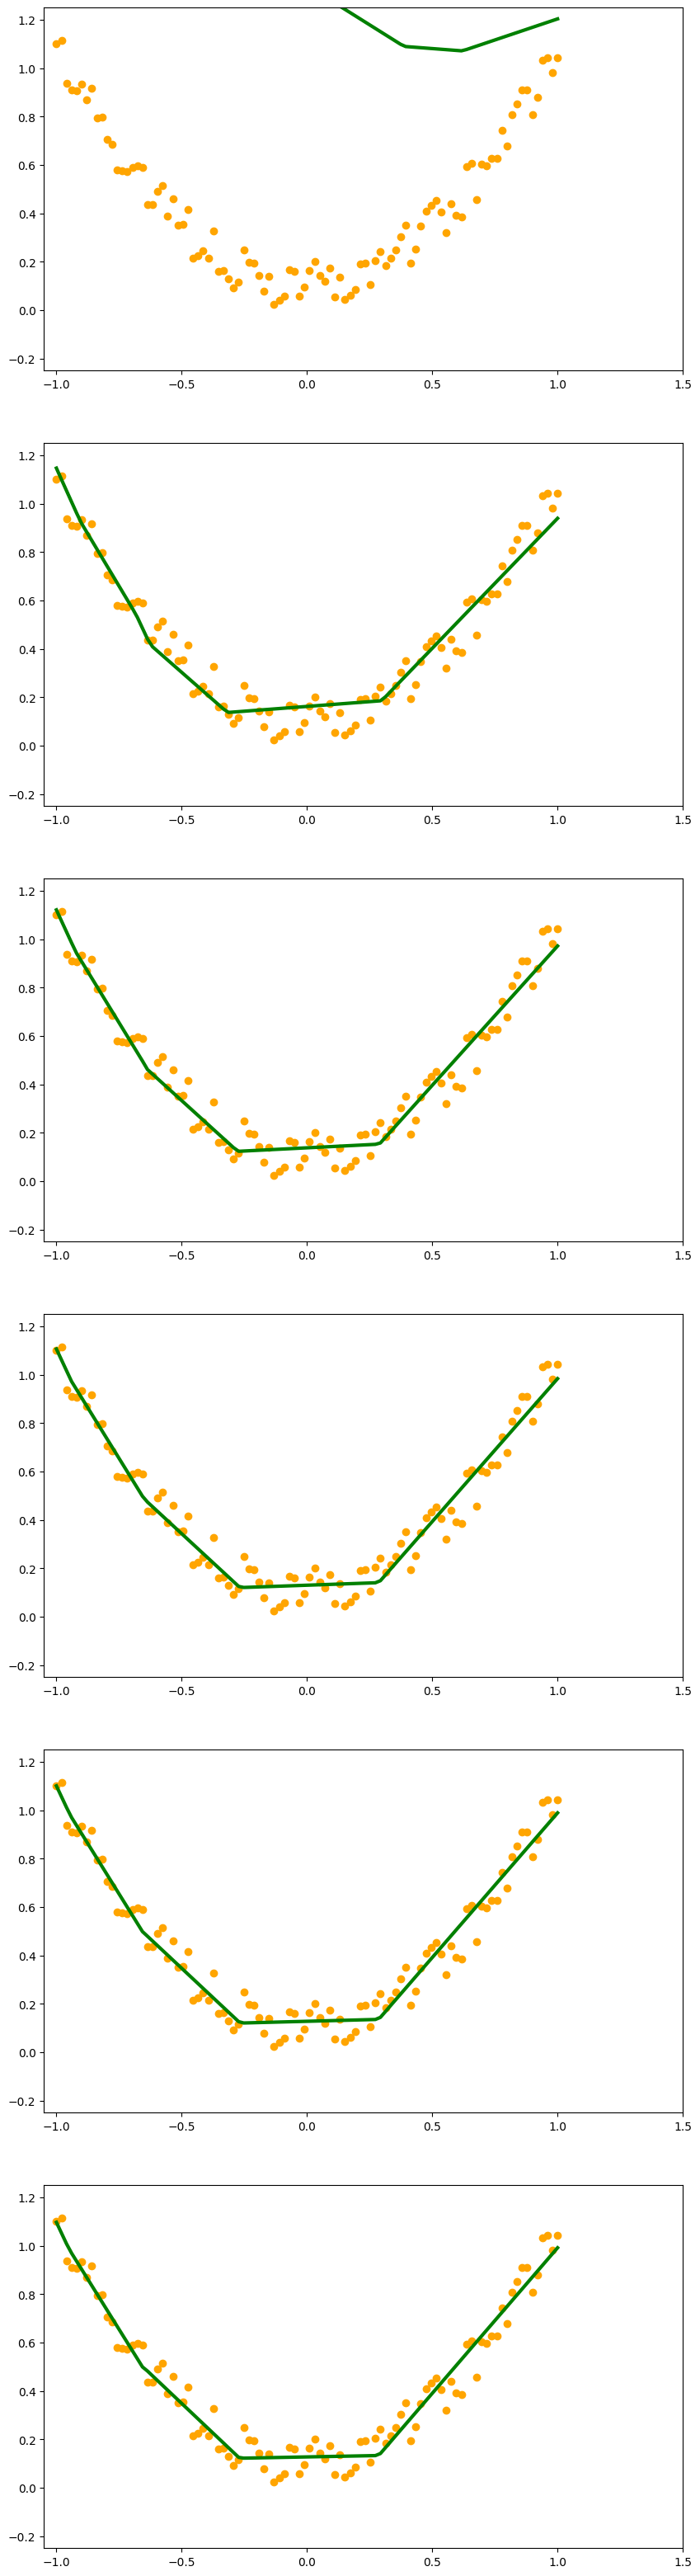

In [401]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(predicts), 1, figsize=(10, 40))
for ax, y_pred in zip(axs, predicts):
    ax.scatter(X.numpy(), y.numpy(), color="orange")
    ax.plot(X.numpy(), y_pred.detach().numpy(), 'g-', lw=3)
    ax.set_xlim(-1.05, 1.5)
    ax.set_ylim(-0.25, 1.25)